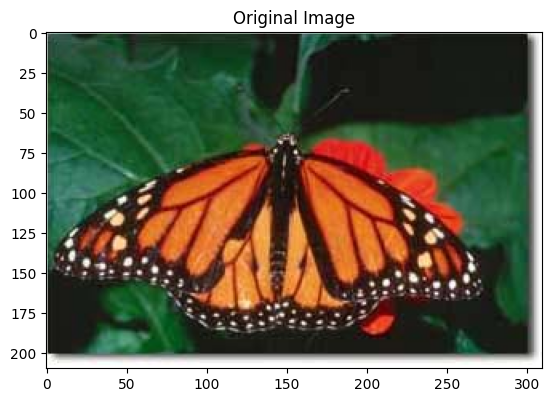

(3, 100, 0.85)


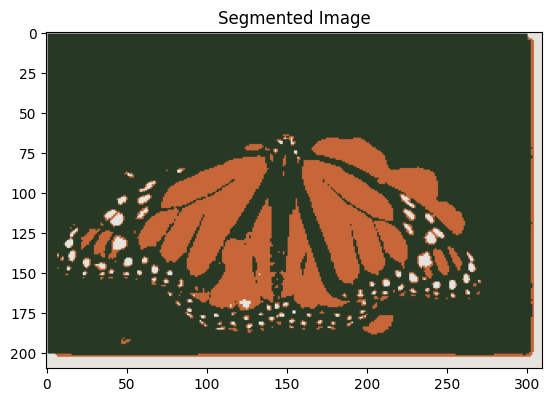

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Uncomment this if running in Jupyter Notebook
# %matplotlib inline

# Path to the image file
image_path = 'monarch.jpeg'  # Update this to the correct path

# Check if the file exists
if not os.path.exists(image_path):
    print(f"File not found: {image_path}")
else:
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image is loaded correctly
    if image is None:
        print(f"Failed to load image: {image_path}")
    else:
        # Change color to RGB (from BGR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the original image
        plt.imshow(image)
        plt.title('Original Image')
        plt.show()

        # Reshape the image to a 2D array of pixels and 3 color values (RGB)
        pixel_vals = image.reshape((-1, 3))

        # Convert to float type
        pixel_vals = np.float32(pixel_vals)

        # Define criteria for k-means algorithm to stop
        # 100 iterations or accuracy of 85%
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
        print(criteria)
        # Number of clusters (K)
        k = 3

        # Perform k-means clustering
        retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        # Convert data back into 8-bit values
        centers = np.uint8(centers)
        segmented_data = centers[labels.flatten()]

        # Reshape data into the original image dimensions
        segmented_image = segmented_data.reshape((image.shape))

        # Display the segmented image
        plt.imshow(segmented_image)
        plt.title('Segmented Image')
        plt.show()
